<a href="https://colab.research.google.com/github/KhaiHuy123/ML__SVM__HCMUS__Course/blob/Khai-Huy/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset:** churn_rate_prediction.csv

**Requirements:**
1. Apply all knowledge and techniques that you have learned for this
2. Organize your notebook based on the Homework
3. Should not drop NA and missing value

**Deadline:** 2023-06-25


# Prepare and Analyze Data

1. Load Dataset
2. Analyze Dataset
3. Preprocess data (type, null, missing, ...)
4. Feature Engineering
5. Data Splitting.

## Load Dataset

In [45]:
# from google.colab import drive
# import os
# drive.mount('/content/drive')
# path = '/content/drive/MyDrive/Colab Notebooks/ML_W01_Dataset'

# %cd $path
# %pwd $path
# os.chdir('/content/drive/MyDrive/Colab Notebooks/ML_W01_Dataset')

In [1]:
"""  """
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [47]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
path = 'churn_rate_prediction.csv'
df = pd.read_csv(path)
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [63]:
# df = pd.read_csv("HomeWork-churn_rate_prediction.csv")
# df.head()

## Data Analysis

In [3]:
""" """
print('-'*150)
print('Describe numerical features')
display(df.describe(include=[float, int ]))
print('-'*150)
print('Describe categorical features')
display(df.describe(include=[object]))
print('-'*150)
print('\tInfo :')
display(df.info())
print('-'*150)
print('\tMissing Values :')
display(df.isnull().sum())

------------------------------------------------------------------------------------------------------------------------------------------------------
Describe numerical features


,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,194.063624,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


------------------------------------------------------------------------------------------------------------------------------------------------------
Describe categorical features


,customer_id,Name,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,avg_frequency_login_days,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
count,36992,36992,36992,36992,31564,36992,36992,36992,36992,36704,36992,36992,36992,36992,36992,36992,36992,36992,36992
unique,36992,36992,3,36992,3,6,1096,3,11359,3,4,3,30101,1654,2,2,2,5,9
top,fffe4300490044003600300030003800,Pattie Morrisey,F,XW0DQ7H,Town,Basic Membership,2015-06-02,No,xxxxxxxx,Gift Vouchers/Coupons,Desktop,Wi-Fi,07:56:41,Error,Yes,Yes,No,Not Applicable,Poor Product Quality
freq,1,1,18490,1,14128,7724,55,15839,17846,12349,13913,12413,6,3522,20342,20440,18602,18602,6350


------------------------------------------------------------------------------------------------------------------------------------------------------
	Info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_typ

None

------------------------------------------------------------------------------------------------------------------------------------------------------
	Missing Values :


customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [4]:
# set display options to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# set the maximum column width to 1000
pd.set_option('display.max_colwidth', 1000)
# set the maximum row height to 1000
pd.set_option('display.max_rows', 1000)

In [5]:
# change str to float for avg_frequency_login_days
df['avg_frequency_login_days'] = df['avg_frequency_login_days'][df['avg_frequency_login_days']!= 'Error'].astype(float)

In [6]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33470.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,15.976715,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,9.215858,194.063624,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-43.652702,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,9.000000,616.150000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,16.000000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,23.000000,763.950000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,5.000000


In [7]:
# explore categorical features unique
df_ = df[df.columns[2:]]
categorical_cols = [feature for feature in df_.columns if df_[feature].dtype == "O"]
for col in categorical_cols:
    print('-'*150)
    print('{}:\n{} \n'.format(col, df[col].unique()))

------------------------------------------------------------------------------------------------------------------------------------------------------
gender:
['F' 'M' 'Unknown'] 

------------------------------------------------------------------------------------------------------------------------------------------------------
security_no:
['XW0DQ7H' '5K0N3X1' '1F2TCL3' ... 'XK1IM9H' 'K6VTP1Z' 'LBX0GLR'] 

------------------------------------------------------------------------------------------------------------------------------------------------------
region_category:
['Village' 'City' 'Town' nan] 

------------------------------------------------------------------------------------------------------------------------------------------------------
membership_category:
['Platinum Membership' 'Premium Membership' 'No Membership'
 'Gold Membership' 'Silver Membership' 'Basic Membership'] 

----------------------------------------------------------------------------------------------

In [8]:
# explore numerical features unique
df_ = df[df.columns[2:]]
numerical_cols = [feature for feature in df_.columns if df_[feature].dtype != "O" ]
for col in numerical_cols:
    print('-'*150)
    print('{}:\n{} \n'.format(col, df[col].unique()))

------------------------------------------------------------------------------------------------------------------------------------------------------
age:
[18 32 44 37 31 13 21 42 45 25 60 11 34 40 16 57 39 33 30 19 48 43 29 10
 20 61 17 12 52 26 49 24 22 36 58 41 50 23 38 35 28 53 55 59 47 54 62 51
 56 27 14 46 15 64 63] 

------------------------------------------------------------------------------------------------------------------------------------------------------
days_since_last_login:
[  17   16   14   11   20   23   10   19   15   13 -999    5   12    9
   21   18    1   22    4    8    3    6    2   24    7   26   25] 

------------------------------------------------------------------------------------------------------------------------------------------------------
avg_time_spent:
[ 300.63       306.34       516.16      ... -638.1234208  154.94
  482.61     ] 

--------------------------------------------------------------------------------------------------------------

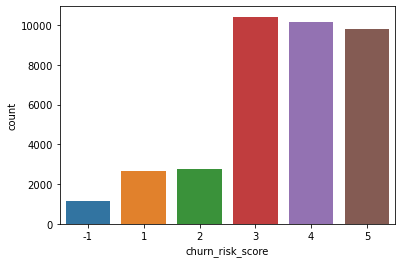

In [179]:
# countplot churn risk score
sns.countplot(x = "churn_risk_score", data=df)
plt.show()

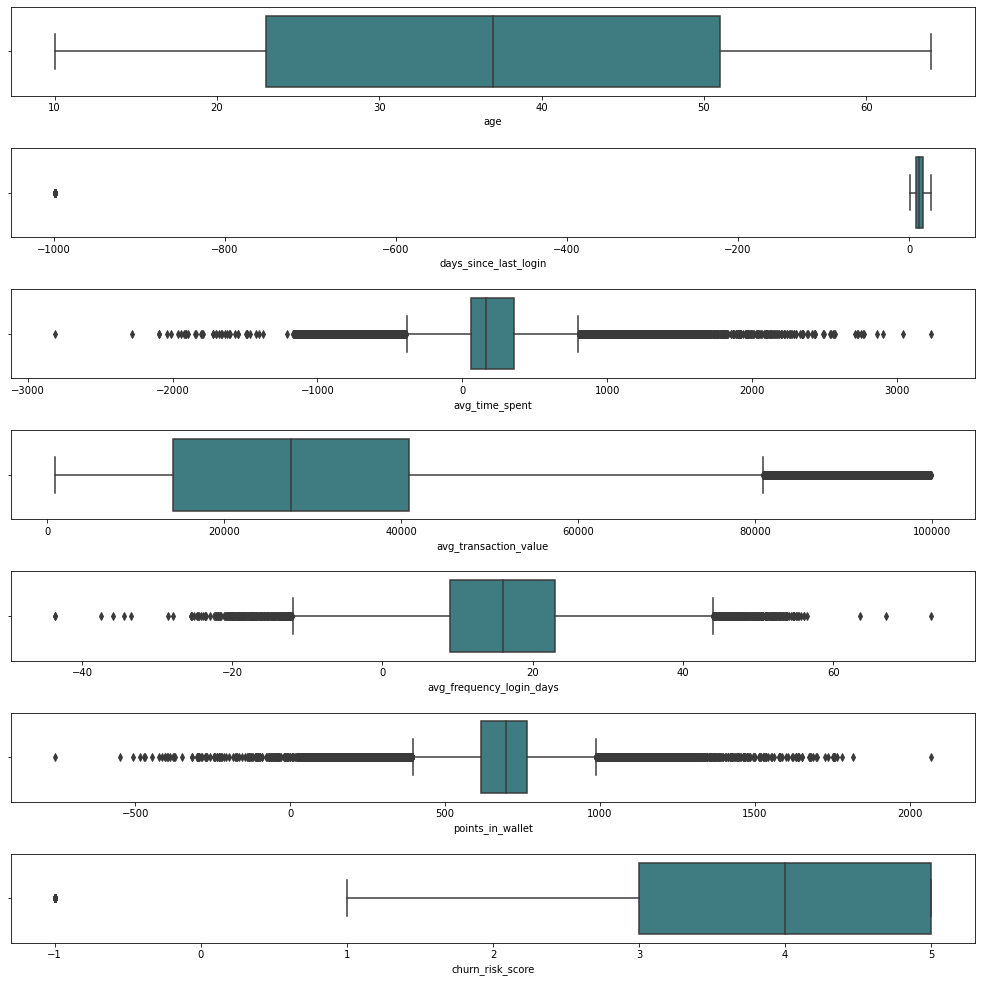

In [10]:
#Boxplot
fig, axes=plt.subplots(len(numerical_cols), 1, figsize=(14, 2*len(numerical_cols)),sharex=False,sharey=False)

for i, column in enumerate(numerical_cols):
    sns.boxplot(x=column,data=df,palette='crest',ax=axes[i])
plt.tight_layout(pad=2.0)

In [9]:
# check unexpected values (negative values) in numerical features
print('Number of all negative values in column days_since_last_login: {}'.format(df['days_since_last_login'][df['days_since_last_login'] < 0].count()))
print('Number of all negative values in column avg_time_spent: {}'.format(df['avg_time_spent'][df['avg_time_spent'] < 0].count()))
print('Number of all negative values in column avg_transaction_value: {}'.format(df['avg_transaction_value'][df['avg_transaction_value'] < 0].count()))
print('Number of all negative values in column points_in_wallet: {}'.format(df['points_in_wallet'][df['points_in_wallet'] < 0].count()))
print('Number of all negative values in column avg_frequency_login_days: {}'.format(df['avg_frequency_login_days'][df['avg_frequency_login_days'] < 0].count()))
print('Number of all negative values in column churn_risk_score: {}'.format(df['churn_risk_score'][df['churn_risk_score'] < 0].count()))

Number of all negative values in column days_since_last_login: 1999
Number of all negative values in column avg_time_spent: 1719
Number of all negative values in column avg_transaction_value: 0
Number of all negative values in column points_in_wallet: 136
Number of all negative values in column avg_frequency_login_days: 683
Number of all negative values in column churn_risk_score: 1163


In [14]:
from pandas_profiling import ProfileReport

'''
Color name in Vietnamese :
#FF0000 (Đỏ)
#FFA500 (Cam)
#FFFF00 (Vàng)
#00FF00 (Xanh lá cây)
#00FFFF (Xanh da trời)
#0000FF (Xanh dương)
#800080 (Tím)
#FF00FF (Hồng)
#808080 (Xám)
#FFFFFF (Trắng)
'''
# Style of html Report
style = {
    'heatmap': {
        'colorscale': 'YlOrRd',  # Choose one color in library colorlover
        'scale': 'log',  # Edit contrast of heatmap
        'reversed': True  # Inverse color of heatmap
    }
}

# Final Analyzed Report
ProfileReport(
    df, title='HomeWork churn rate prediction Report',
    minimal=True,
    progress_bar=False,
    samples=None,
    interactions=None,
    explorative=True,
    dark_mode=True,
    notebook={'iframe':{'height': '500px'}},
    html={'style': style},
    missing_diagrams={'heatmap': False, 'dendrogram': True,})

## Preprocessing

In [21]:
# split column joining_date to 3 columns : year, mounth, day
date = pd.to_datetime(df['joining_date'])
df['joining_date_year'] = pd.DatetimeIndex(date).year
df['joining_date_month'] = pd.DatetimeIndex(date).month
df['joining_date_day'] = pd.DatetimeIndex(date).day
df.drop('joining_date', axis  = 1, inplace = True)
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,joining_date_year,joining_date_month,joining_date_day
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2,2017,8,17
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1,2017,8,28
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5,2016,11,11
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5,2016,10,29
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5,2017,9,12


In [22]:
# change values of column last_visit_time to float number (unit = hour)
df['last_visit_time'] = pd.to_datetime(df['last_visit_time'], format='%H:%M:%S').dt.time
df['last_visit_time'] = df['last_visit_time'].apply(lambda x: (x.hour * 3600 + x.minute*60 + x.second)/3600)
df['last_visit_time']

0        16.133889
1        12.636944
2        22.889167
3        15.963889
4        15.778889
           ...    
36987     4.234722
36988    23.308611
36989     3.840278
36990     9.834167
36991     1.664444
Name: last_visit_time, Length: 36992, dtype: float64

In [23]:
# check unexpected values (unexpected symbols)
missing_values = ['Unknown', '?', 'NaN', np.nan, None, 'Null', 'Missing', 'N/A', 'Error']
df.isin(missing_values).sum()

customer_id                        0
Name                               0
age                                0
gender                            59
security_no                        0
region_category                 5428
membership_category                0
joined_through_referral         5438
referral_id                        0
preferred_offer_types            288
medium_of_operation             5393
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days        3522
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
joining_date_year                  0
joining_date_month                 0
joining_date_day                   0
d

In [24]:
# Replace all unexpected values with NaN values
mask = df.isin(missing_values)
df[mask] = np.nan
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,joining_date_year,joining_date_month,joining_date_day
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,No,xxxxxxxx,Gift Vouchers/Coupons,NaN,Wi-Fi,16.133889,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2,2017,8,17
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,NaN,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12.636944,16,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1,2017,8,28
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22.889167,14,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5,2016,11,11
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15.963889,11,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5,2016,10,29
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15.778889,20,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5,2017,9,12


In [25]:
def print_columns_with_nan(df):
    nan_columns = df.columns[df.isnull().any()].tolist()
    numerical_col = []
    categorical_col = []
    print("Columns with NaN values in  DataFrame df : ")
    for col in nan_columns:
        if df[col].dtype == "object": categorical_col.append(col)
        else: numerical_col.append(col)
    print("Numerical columns  : ", numerical_col)
    print("Categorical columns : ", categorical_col)
    
print_columns_with_nan(df)

Columns with NaN values in  DataFrame df : 
Numerical columns  :  ['avg_frequency_login_days', 'points_in_wallet']
Categorical columns :  ['gender', 'region_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation']


In [33]:
""" """
# Replace negative values with mode/mean/zero/abs.
def replace_negative_values_mode(df, features):
    for col in features:
        mode_value = df[col].mode().iloc[0]
        df.loc[df[col] < 0, col] = mode_value
    return df        
def replace_negative_values_mean(df, features): 
    for col in features:
        mode_value = df[col].mean()
        df.loc[df[col] < 0, col] = mode_value
    return df         
def replace_negative_values_abs(df, features):
    for col in features:
        df.loc[df[col] < 0, col] = df.loc[df[col] < 0, col].abs()
    return df
def replace_negative_values_zero(df, features):
    for col in features:
        df.loc[df[col] < 0, col] = 0
    return df

In [40]:
# Replace all negative values with NaN value then use KNN to fill.
def replace_negative_values_nan(df, features):
    for col in features:
        df[col][df[col] < 0] = np.nan
    return df

In [35]:
from sklearn.impute import KNNImputer

def replace_negative_values_KNN(df, features):
    imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
    df_negative_trans = imputer.fit_transform(df[features])
    df_negative_trans = pd.DataFrame(df_negative_trans)
    for i in range(len(features)):
        df[features[i]] = df_negative_trans[i].values
    return df

In [119]:
""" Data 1 """
# Replace negative values by using KNN
def preprocessing_data(df):
    df = replace_negative_values_nan(df, features = ['days_since_last_login','avg_time_spent', 'avg_frequency_login_days', 'points_in_wallet'])
    df = replace_negative_values_KNN(df, features = ['days_since_last_login','avg_time_spent', 'avg_frequency_login_days', 'points_in_wallet'])
    df.drop(df[df['churn_risk_score'] == -1].index, inplace = True)
    df.drop(["customer_id", "Name", "security_no", "referral_id"], axis=1, inplace=True) # Drop unexpected columns
    
    # Fill NaN values
    for col in df.columns:
        if df[col].dtype == object:
            # Categorical column
            fill_value = df[col].mode().iloc[0]  # Mode value
            df[col].fillna(fill_value, inplace=True) # Fill NaN with Mode Value
        else:
            # Numerical column
            mean_value = df[col].mean()
            df[col].fillna(mean_value, inplace=True) # Fill NaN with Mean
    return df
df_1 = preprocessing_data(df.copy())
df_1

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,joining_date_year,joining_date_month,joining_date_day
0,18,F,Village,Platinum Membership,No,Gift Vouchers/Coupons,Desktop,Wi-Fi,16.133889,17.0,300.630000,53005.25,17.000000,781.750000,Yes,Yes,No,Not Applicable,Products always in Stock,2,2017,8,17
1,32,F,City,Premium Membership,No,Gift Vouchers/Coupons,Desktop,Mobile_Data,12.636944,16.0,306.340000,12838.38,10.000000,690.389359,Yes,No,Yes,Solved,Quality Customer Care,1,2017,8,28
2,44,F,Town,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,22.889167,14.0,516.160000,21027.00,22.000000,500.690000,No,Yes,Yes,Solved in Follow-up,Poor Website,5,2016,11,11
3,37,M,City,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,15.963889,11.0,53.270000,25239.56,6.000000,567.660000,No,Yes,Yes,Unsolved,Poor Website,5,2016,10,29
4,31,F,City,No Membership,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,15.778889,20.0,113.130000,24483.66,16.000000,663.060000,No,Yes,Yes,Solved,Poor Website,5,2017,9,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36987,46,F,Town,Basic Membership,No,Credit/Debit Card Offers,Desktop,Wi-Fi,4.234722,2.0,292.491498,27277.68,6.000000,639.510000,No,Yes,Yes,No Information Available,No reason specified,4,2017,9,21
36988,29,F,Town,Basic Membership,No,Without Offers,Smartphone,Wi-Fi,23.308611,13.0,292.491498,11069.71,28.000000,527.990000,Yes,No,No,Not Applicable,Poor Customer Service,5,2016,6,27
36989,23,F,Town,Basic Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,3.840278,12.0,154.940000,38127.56,16.523181,680.470000,No,Yes,Yes,Unsolved,Poor Website,4,2016,9,11
36990,53,M,Village,Platinum Membership,No,Gift Vouchers/Coupons,Smartphone,Mobile_Data,9.834167,15.0,482.610000,2378.86,20.000000,197.264414,Yes,Yes,No,Not Applicable,No reason specified,3,2017,6,15


In [120]:
# Check after preprocessing section
print('Number of all negative values in column days_since_last_login: {}'.format(df_1['days_since_last_login'][df_1['days_since_last_login'] < 0].count()))
print('Number of all negative values in column avg_time_spent: {}'.format(df_1['avg_time_spent'][df_1['avg_time_spent'] < 0].count()))
print('Number of all negative values in column avg_transaction_value: {}'.format(df_1['avg_transaction_value'][df_1['avg_transaction_value'] < 0].count()))
print('Number of all negative values in column points_in_wallet: {}'.format(df_1['points_in_wallet'][df_1['points_in_wallet'] < 0].count()))
print('Number of all negative values in column avg_frequency_login_days: {}'.format(df_1['avg_frequency_login_days'][df_1['avg_frequency_login_days'] < 0].count()))

print_columns_with_nan(df_1)

Number of all negative values in column days_since_last_login: 0
Number of all negative values in column avg_time_spent: 0
Number of all negative values in column avg_transaction_value: 0
Number of all negative values in column points_in_wallet: 0
Number of all negative values in column avg_frequency_login_days: 0
Columns with NaN values in  DataFrame df : 
Numerical columns  :  []
Categorical columns :  []


In [62]:
""" Data 2 """
# Replace negative values with mode and mean.
def preprocessing_data_2(df):
    df = replace_negative_values_mode(df, features = ['days_since_last_login'])
    df = replace_negative_values_mean(df, features = ['avg_time_spent', 'avg_frequency_login_days', 'points_in_wallet'])
    df.drop(df[df['churn_risk_score'] == -1].index, inplace = True)
    df.drop(["customer_id", "Name", "security_no", "referral_id"], axis=1, inplace=True) # Drop unexpected columns
    
    # Fill NaN values
    for col in df.columns:
        if df[col].dtype == object:
            # Categorical column
            fill_value = df[col].mode().iloc[0]  # Mode value
            df[col].fillna(fill_value, inplace=True) # Fill NaN with Mode Value
        else:
            # Numerical column
            mean_value = df[col].mean()
            df[col].fillna(mean_value, inplace=True) # Fill NaN with Mean
    return df

df_2 = preprocessing_data_2(df.copy())
df_2

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,joining_date_year,joining_date_month,joining_date_day
0,18,F,Village,Platinum Membership,No,Gift Vouchers/Coupons,Desktop,Wi-Fi,16.133889,17,300.630000,53005.25,17.00000,781.750000,Yes,Yes,No,Not Applicable,Products always in Stock,2,2017,8,17
1,32,F,City,Premium Membership,No,Gift Vouchers/Coupons,Desktop,Mobile_Data,12.636944,16,306.340000,12838.38,10.00000,690.374894,Yes,No,Yes,Solved,Quality Customer Care,1,2017,8,28
2,44,F,Town,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,22.889167,14,516.160000,21027.00,22.00000,500.690000,No,Yes,Yes,Solved in Follow-up,Poor Website,5,2016,11,11
3,37,M,City,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,15.963889,11,53.270000,25239.56,6.00000,567.660000,No,Yes,Yes,Unsolved,Poor Website,5,2016,10,29
4,31,F,City,No Membership,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,15.778889,20,113.130000,24483.66,16.00000,663.060000,No,Yes,Yes,Solved,Poor Website,5,2017,9,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36987,46,F,Town,Basic Membership,No,Credit/Debit Card Offers,Desktop,Wi-Fi,4.234722,2,243.472334,27277.68,6.00000,639.510000,No,Yes,Yes,No Information Available,No reason specified,4,2017,9,21
36988,29,F,Town,Basic Membership,No,Without Offers,Smartphone,Wi-Fi,23.308611,13,243.472334,11069.71,28.00000,527.990000,Yes,No,No,Not Applicable,Poor Customer Service,5,2016,6,27
36989,23,F,Town,Basic Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,3.840278,12,154.940000,38127.56,16.51207,680.470000,No,Yes,Yes,Unsolved,Poor Website,4,2016,9,11
36990,53,M,Village,Platinum Membership,No,Gift Vouchers/Coupons,Smartphone,Mobile_Data,9.834167,15,482.610000,2378.86,20.00000,197.264414,Yes,Yes,No,Not Applicable,No reason specified,3,2017,6,15


## Feature Engineering

In [ ]:
def apply_feature_engineering(df):
    categorical_cols = [feature for feature in df.columns if df[feature].dtype == "O"]
    numerical_cols = [feature for feature in df.columns if df[feature].dtype != "O"]
    temp_df = pd.get_dummies(df.loc[:,categorical_cols])
    df_output = pd.concat([temp_df, df.loc[:,numerical_cols]],axis=1)
    return df_output

,gender_F,gender_M,region_category_City,region_category_Town,region_category_Village,membership_category_Basic Membership,membership_category_Gold Membership,membership_category_No Membership,membership_category_Platinum Membership,membership_category_Premium Membership,membership_category_Silver Membership,joined_through_referral_No,joined_through_referral_Yes,preferred_offer_types_Credit/Debit Card Offers,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers,medium_of_operation_Both,medium_of_operation_Desktop,medium_of_operation_Smartphone,internet_option_Fiber_Optic,internet_option_Mobile_Data,internet_option_Wi-Fi,used_special_discount_No,used_special_discount_Yes,offer_application_preference_No,offer_application_preference_Yes,past_complaint_No,past_complaint_Yes,complaint_status_No Information Available,complaint_status_Not Applicable,complaint_status_Solved,complaint_status_Solved in Follow-up,complaint_status_Unsolved,feedback_No reason specified,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website,age,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score,joining_date_year,joining_date_month,joining_date_day
0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,18,16.133889,17.0,300.630000,53005.25,17.000000,781.750000,2,2017,8,17
1,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,32,12.636944,16.0,306.340000,12838.38,10.000000,690.389359,1,2017,8,28
2,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,44,22.889167,14.0,516.160000,21027.00,22.000000,500.690000,5,2016,11,11
3,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,37,15.963889,11.0,53.270000,25239.56,6.000000,567.660000,5,2016,10,29
4,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,31,15.778889,20.0,113.130000,24483.66,16.000000,663.060000,5,2017,9,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36987,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,46,4.234722,2.0,292.491498,27277.68,6.000000,639.510000,4,2017,9,21
36988,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,29,23.308611,13.0,292.491498,11069.71,28.000000,527.990000,5,2016,6,27
36989,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,23,3.840278,12.0,154.940000,38127.56,16.523181,680.470000,4,2016,9,11
36990,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,53,9.834167,15.0,482.610000,2378.86,20.000000,197.264414,3,2017,6,15


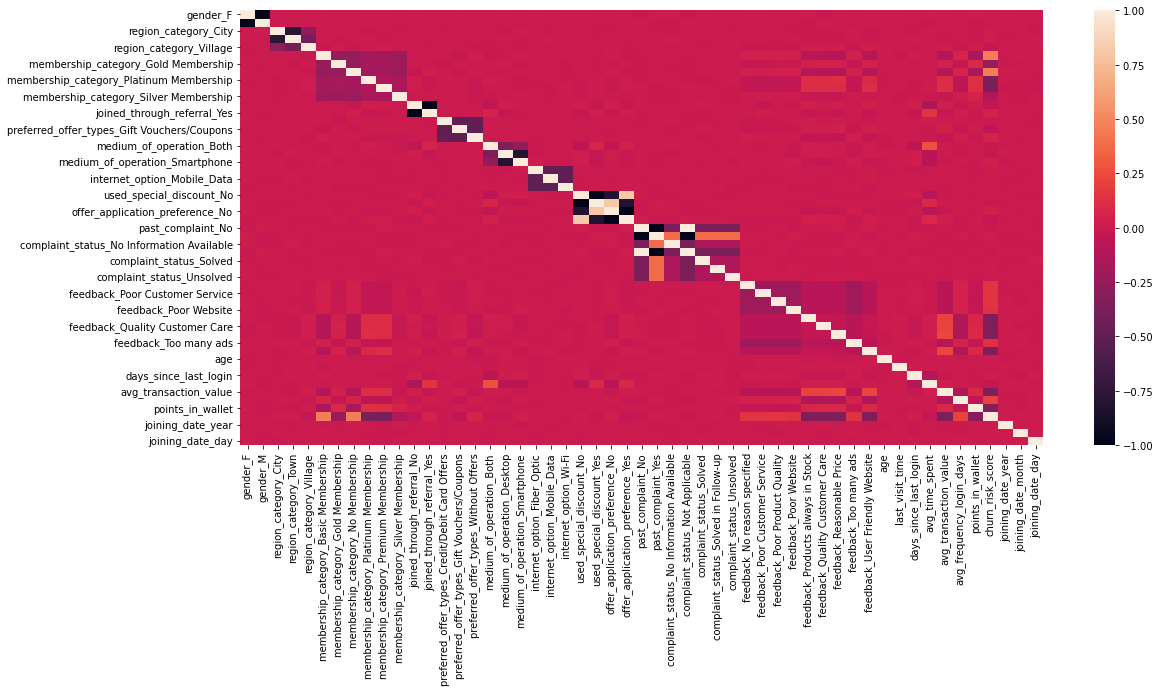

In [121]:
""" Data 1 """
final_data_1 = apply_feature_engineering(df_1.copy())
display(final_data)

plt.figure(figsize=(18,8))
sns.heatmap(final_data_1.corr())
plt.show()

,gender_F,gender_M,region_category_City,region_category_Town,region_category_Village,membership_category_Basic Membership,membership_category_Gold Membership,membership_category_No Membership,membership_category_Platinum Membership,membership_category_Premium Membership,membership_category_Silver Membership,joined_through_referral_No,joined_through_referral_Yes,preferred_offer_types_Credit/Debit Card Offers,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers,medium_of_operation_Both,medium_of_operation_Desktop,medium_of_operation_Smartphone,internet_option_Fiber_Optic,internet_option_Mobile_Data,internet_option_Wi-Fi,used_special_discount_No,used_special_discount_Yes,offer_application_preference_No,offer_application_preference_Yes,past_complaint_No,past_complaint_Yes,complaint_status_No Information Available,complaint_status_Not Applicable,complaint_status_Solved,complaint_status_Solved in Follow-up,complaint_status_Unsolved,feedback_No reason specified,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website,age,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score,joining_date_year,joining_date_month,joining_date_day
0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,18,16.133889,17,300.630000,53005.25,17.00000,781.750000,2,2017,8,17
1,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,32,12.636944,16,306.340000,12838.38,10.00000,690.374894,1,2017,8,28
2,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,44,22.889167,14,516.160000,21027.00,22.00000,500.690000,5,2016,11,11
3,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,37,15.963889,11,53.270000,25239.56,6.00000,567.660000,5,2016,10,29
4,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,31,15.778889,20,113.130000,24483.66,16.00000,663.060000,5,2017,9,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36987,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,46,4.234722,2,243.472334,27277.68,6.00000,639.510000,4,2017,9,21
36988,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,29,23.308611,13,243.472334,11069.71,28.00000,527.990000,5,2016,6,27
36989,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,23,3.840278,12,154.940000,38127.56,16.51207,680.470000,4,2016,9,11
36990,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,53,9.834167,15,482.610000,2378.86,20.00000,197.264414,3,2017,6,15


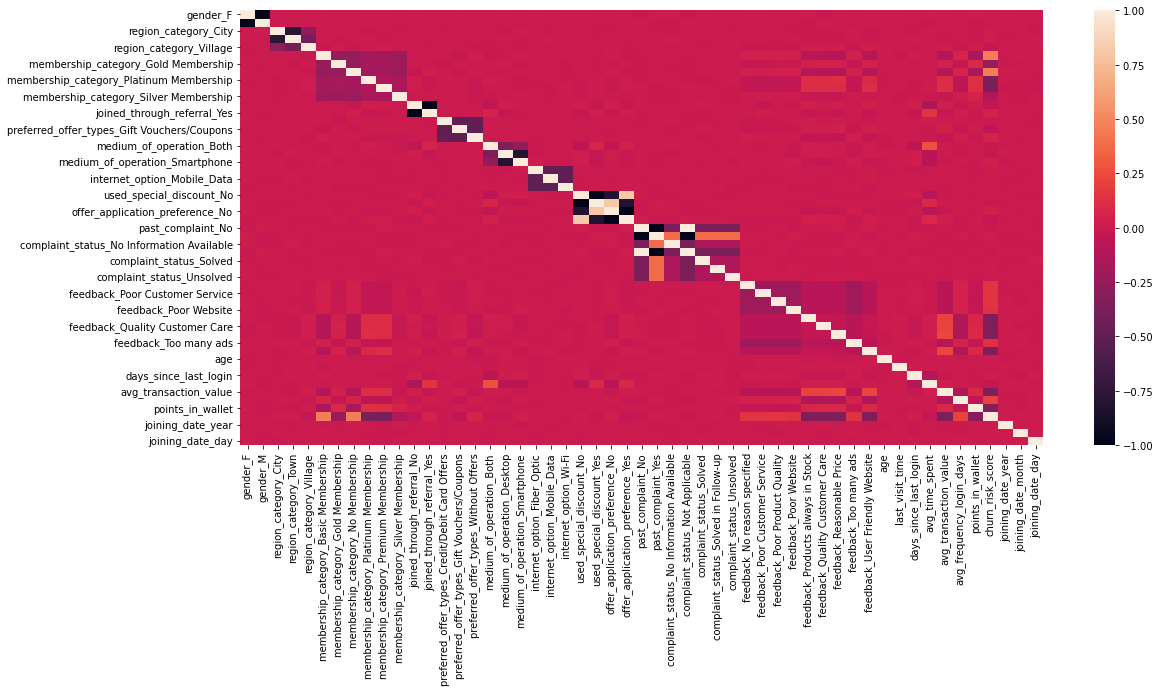

In [122]:
""" Data 2 """
final_data_2 = apply_feature_engineering(df_2.copy())
display(final_data_2)

plt.figure(figsize=(18,8))
sns.heatmap(final_data_2.corr())
plt.show()

## Train-test split

In [126]:
def prepare_data(df, target):
    feature_names = df.columns.tolist()
    feature_names.remove('churn_risk_score')
    X = df[feature_names]
    y = df[target]
    return X, y

In [127]:
""" Data 1 """
X_1, y_1 = prepare_data(final_data_1.copy(), target='churn_risk_score')

In [128]:
""" Data 2 """
X_2, y_2 = prepare_data(final_data_2.copy(), target='churn_risk_score')

In [164]:
""" """
from sklearn.model_selection import train_test_split
RANDOM_STATE = 42
TRAIN_SIZE = 0.75

""" Data 1 """
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, train_size = TRAIN_SIZE, random_state = RANDOM_STATE)

In [130]:
""" Data 2 """
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, train_size = TRAIN_SIZE, random_state = RANDOM_STATE)

In [165]:
# scaler
from sklearn.preprocessing import StandardScaler, RobustScaler

""" Data 1 """
scaler_1 = RobustScaler(quantile_range = (25,75))
X_train_1 = scaler_1.fit_transform(X_train_1) #fit_transform có tác dụng vừa fit data, vừa transform data
X_test_1 = scaler_1.transform(X_test_1)

In [132]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(sampling_strategy='minority')
# X_train, y_train = smote.fit_resample(X_train, y_train)

In [133]:
""" Data 2 """
scaler_2 = RobustScaler(quantile_range = (25,75))
X_train_2 = scaler_2.fit_transform(X_train_2) #fit_transform có tác dụng vừa fit data, vừa transform data
X_test_2 = scaler_2.transform(X_test_2)

In [134]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(sampling_strategy='minority')
# X_train_2, y_train_2 = smote.fit_resample(X_train_2, y_train_2)

# Apply machine learning model

## SVC

In [140]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def calculate_performance(y_test, y_pred):

    print("Accuracy: ", accuracy_score(y_test , y_pred))
    print("Precision: ", precision_score(y_test , y_pred, average = 'macro'))
    print("Recall: ", recall_score(y_test , y_pred, average = 'macro'))
    print("F1: ", f1_score(y_test , y_pred, average = 'macro'))
    print("Confusion matrix: \n", confusion_matrix(y_test , y_pred))
    print("Classification report: \n", classification_report(y_test , y_pred))
    main_score =  f1_score(y_test , y_pred, average = 'macro')
    return main_score

In [141]:
from sklearn.svm import SVC
""" Data 1 """
svm_model = SVC(C = 1.3) # Default kernel = rbf
svm_model.fit(X_train_1, y_train_1)
# Đánh giá kết quả trên tập test
predicted_label_1 = svm_model.predict(X_test_1)
calculate_performance(y_test_1, predicted_label_1)

Accuracy:  0.7481580709979906
Precision:  0.734376490582618
Recall:  0.7267818334122093
F1:  0.71337724177665
Confusion matrix: 
 [[ 497  182    0    0    0]
 [ 259  424    1    1    0]
 [   0    0 2402  284    0]
 [   0    0  254 1030 1221]
 [   0    0    2   52 2349]]
Classification report: 
               precision    recall  f1-score   support

           1       0.66      0.73      0.69       679
           2       0.70      0.62      0.66       685
           3       0.90      0.89      0.90      2686
           4       0.75      0.41      0.53      2505
           5       0.66      0.98      0.79      2403

    accuracy                           0.75      8958
   macro avg       0.73      0.73      0.71      8958
weighted avg       0.76      0.75      0.73      8958



0.71337724177665

In [142]:
""" Data 2 """
svm_model = SVC(C = 1.3)
svm_model.fit(X_train_2, y_train_2)
# Đánh giá kết quả trên tập test
predicted_label_2 = svm_model.predict(X_test_2)
calculate_performance(y_test_2, predicted_label_2)

Accuracy:  0.7479348068765349
Precision:  0.734129898679673
Recall:  0.7266241439516845
F1:  0.7132404574037647
Confusion matrix: 
 [[ 497  182    0    0    0]
 [ 259  424    1    1    0]
 [   0    0 2401  285    0]
 [   0    0  254 1030 1221]
 [   0    0    2   53 2348]]
Classification report: 
               precision    recall  f1-score   support

           1       0.66      0.73      0.69       679
           2       0.70      0.62      0.66       685
           3       0.90      0.89      0.90      2686
           4       0.75      0.41      0.53      2505
           5       0.66      0.98      0.79      2403

    accuracy                           0.75      8958
   macro avg       0.73      0.73      0.71      8958
weighted avg       0.76      0.75      0.73      8958



0.7132404574037647

In [111]:
""" """
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV

def build_model_svm(X, y):
    scale = RobustScaler()
    model = SVC(kernel = 'rbf') 
    pipe = make_pipeline(scale, model)

    param_grid = {
        'svc__C': [1.0, 1.3, 1.5, 1.8, 2.0],
    }
    grid_Search = GridSearchCV(pipe , param_grid, scoring = 'f1_macro', n_jobs = -1)
    grid_Search.fit(X, y)

    print(f'Best params with score {grid_Search.best_score_} are: \t\n {grid_Search.best_params_}')

    best_model = grid_Search.best_estimator_

    return best_model


In [112]:
model = build_model_svm(X_train_1, y_train_1) 

Best params with score 0.739980065950615 are: 	
 {'svc__C': 1.0}


In [143]:
from sklearn.svm import SVC

""" Data 1 """
svm_model = SVC(C = 1.0) # Default kernel = rbf
svm_model.fit(X_train_1, y_train_1)
# Đánh giá kết quả trên tập test
predicted_label_1 = svm_model.predict(X_test_1)
calculate_performance(y_test_1, predicted_label_1)


Accuracy:  0.7472650145121679
Precision:  0.7337519014367322
Recall:  0.7247093962700688
F1:  0.7101616339765867
Confusion matrix: 
 [[ 501  178    0    0    0]
 [ 269  413    2    1    0]
 [   0    0 2407  279    0]
 [   0    0  265 1004 1236]
 [   0    0    1   33 2369]]
Classification report: 
               precision    recall  f1-score   support

           1       0.65      0.74      0.69       679
           2       0.70      0.60      0.65       685
           3       0.90      0.90      0.90      2686
           4       0.76      0.40      0.53      2505
           5       0.66      0.99      0.79      2403

    accuracy                           0.75      8958
   macro avg       0.73      0.72      0.71      8958
weighted avg       0.76      0.75      0.73      8958



0.7101616339765867

In [ ]:
""" In SVC, GridSearchCV takes too long, But the result is C = 1.0, not as good as C = 1.3. """

## Compare with Lab04

In [172]:
""" DecisionTreeClassifier """
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def build_model_dtc(X, y):
    dtc = DecisionTreeClassifier() 
    param_grid = {
    'criterion': ["gini", "entropy", "log_loss"]
    }
    model = GridSearchCV(dtc, param_grid, scoring = "f1_macro", n_jobs=-1)
    model.fit(X, y)
    print(f'Best params with score {model.best_score_} are: \t\n {model.best_params_}')
    return model

In [173]:
""" Data 1 """
model_dtc = build_model_dtc(X_train_1, y_train_1)
# Compare on training dataset
pred = model_dtc.predict(X_test_1)
calculate_performance(y_test_1, pred)

Best params with score 0.7530421938930928 are: 	
 {'criterion': 'log_loss'}
Accuracy:  0.7679169457468185
Precision:  0.7615627202943765
Recall:  0.7612081621399749
F1:  0.7613655641306876
Confusion matrix: 
 [[ 514  165    0    0    0]
 [ 173  512    0    0    0]
 [   0    0 2424  262    0]
 [   0    0  230 1642  633]
 [   0    0    0  616 1787]]
Classification report: 
               precision    recall  f1-score   support

           1       0.75      0.76      0.75       679
           2       0.76      0.75      0.75       685
           3       0.91      0.90      0.91      2686
           4       0.65      0.66      0.65      2505
           5       0.74      0.74      0.74      2403

    accuracy                           0.77      8958
   macro avg       0.76      0.76      0.76      8958
weighted avg       0.77      0.77      0.77      8958



0.7613655641306876

In [174]:
""" Data 2 """
model_dtc = build_model_dtc(X_train_2, y_train_2)
# Compare on training dataset
pred = model_dtc.predict(X_test_2)
calculate_performance(y_test_2, pred)

Best params with score 0.7546100278030016 are: 	
 {'criterion': 'entropy'}
Accuracy:  0.7730520205402992
Precision:  0.7631799504386765
Recall:  0.7626574512773475
F1:  0.7628833235048126
Confusion matrix: 
 [[ 511  168    0    0    0]
 [ 180  504    1    0    0]
 [   0    0 2421  265    0]
 [   0    0  231 1672  602]
 [   0    0    0  586 1817]]
Classification report: 
               precision    recall  f1-score   support

           1       0.74      0.75      0.75       679
           2       0.75      0.74      0.74       685
           3       0.91      0.90      0.91      2686
           4       0.66      0.67      0.67      2505
           5       0.75      0.76      0.75      2403

    accuracy                           0.77      8958
   macro avg       0.76      0.76      0.76      8958
weighted avg       0.77      0.77      0.77      8958



0.7628833235048126

In [ ]:
""" RandomForestClassifier """
from sklearn.ensemble import RandomForestClassifier

def build_model_rfc(X, y):
    rfc = RandomForestClassifier()
    param_grid = {
    'criterion': ["gini", "entropy", "log_loss"],
    'max_features' : ['sqrt', 'log2', 'None']
    }
    model = GridSearchCV(rfc, param_grid, scoring = "f1_macro", n_jobs = -1)
    model.fit(X, y)
    print(f'Best params with score {model.best_score_} are: \t\n {model.best_params_}')
    return model

In [161]:
""" Data 1 """
model_rfc = build_model_rfc(X_train_1, y_train_1)
# Compare on training dataset
pred = model_rfc.predict(X_test_1)
calculate_performance(y_test_1, pred)

Best params with score 0.765380811898227 are: 	
 {'criterion': 'log_loss', 'max_features': 'sqrt'}
Accuracy:  0.7743916052690333
Precision:  0.7666965082313416
Recall:  0.7657726569991521
F1:  0.7600377020976948
Confusion matrix: 
 [[ 529  150    0    0    0]
 [ 194  491    0    0    0]
 [   0    0 2440  246    0]
 [   0    0  227 1320  958]
 [   0    0    0  246 2157]]
Classification report: 
               precision    recall  f1-score   support

           1       0.73      0.78      0.75       679
           2       0.77      0.72      0.74       685
           3       0.91      0.91      0.91      2686
           4       0.73      0.53      0.61      2505
           5       0.69      0.90      0.78      2403

    accuracy                           0.77      8958
   macro avg       0.77      0.77      0.76      8958
weighted avg       0.78      0.77      0.77      8958



0.7600377020976948

In [175]:
""" Data 2 """
model_rfc = build_model_rfc(X_train_2, y_train_2)
# Compare on training dataset
pred = model_rfc.predict(X_test_2)
calculate_performance(y_test_2, pred)

Best params with score 0.7620331562233578 are: 	
 {'criterion': 'entropy', 'max_features': 'sqrt'}
Accuracy:  0.7804197365483366
Precision:  0.7761713145573821
Recall:  0.7744671709892637
F1:  0.7686169672675012
Confusion matrix: 
 [[ 547  132    0    0    0]
 [ 192  493    0    0    0]
 [   0    0 2437  249    0]
 [   0    0  222 1334  949]
 [   0    0    0  223 2180]]
Classification report: 
               precision    recall  f1-score   support

           1       0.74      0.81      0.77       679
           2       0.79      0.72      0.75       685
           3       0.92      0.91      0.91      2686
           4       0.74      0.53      0.62      2505
           5       0.70      0.91      0.79      2403

    accuracy                           0.78      8958
   macro avg       0.78      0.77      0.77      8958
weighted avg       0.78      0.78      0.77      8958



0.7686169672675012

In [168]:
""" XGBoost """

import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

""" Data 1 """
le = LabelEncoder()
y_train_ = le.fit_transform(y_train_1.copy())
y_test_ = le.transform(y_test_1.copy())

model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train_1, y_train_)
pred = model_xgb.predict(X_test_1)
calculate_performance(y_test_, pred)

Accuracy:  0.7791917838803304
Precision:  0.771891727683893
Recall:  0.7717750949156943
F1:  0.7696211684969887
Confusion matrix: 
 [[ 552  127    0    0    0]
 [ 202  483    0    0    0]
 [   0    0 2449  237    0]
 [   0    0  206 1523  776]
 [   0    0    0  430 1973]]
Classification report: 
               precision    recall  f1-score   support

           0       0.73      0.81      0.77       679
           1       0.79      0.71      0.75       685
           2       0.92      0.91      0.92      2686
           3       0.70      0.61      0.65      2505
           4       0.72      0.82      0.77      2403

    accuracy                           0.78      8958
   macro avg       0.77      0.77      0.77      8958
weighted avg       0.78      0.78      0.78      8958



0.7696211684969887

In [176]:
""" Data 2 """
le = LabelEncoder()
y_train_ = le.fit_transform(y_train_2.copy())
y_test_ = le.transform(y_test_2.copy())

model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train_2, y_train_)
pred = model_xgb.predict(X_test_2)
calculate_performance(y_test_, pred)

Accuracy:  0.7796383121232418
Precision:  0.7754512728663709
Recall:  0.7751720255198211
F1:  0.7729806046437755
Confusion matrix: 
 [[ 559  120    0    0    0]
 [ 195  490    0    0    0]
 [   0    0 2438  248    0]
 [   0    0  203 1515  787]
 [   0    0    0  421 1982]]
Classification report: 
               precision    recall  f1-score   support

           0       0.74      0.82      0.78       679
           1       0.80      0.72      0.76       685
           2       0.92      0.91      0.92      2686
           3       0.69      0.60      0.65      2505
           4       0.72      0.82      0.77      2403

    accuracy                           0.78      8958
   macro avg       0.78      0.78      0.77      8958
weighted avg       0.78      0.78      0.78      8958



0.7729806046437755

In [170]:
""" CatBoost """
import catboost as ctb

""" Data 1 """
model_cbc = ctb.CatBoostClassifier(silent = True)
model_cbc.fit(X_train_1, y_train_1)
pred = model_cbc.predict(X_test_1)
calculate_performance(y_test_1, pred)

Accuracy:  0.7847733869167225
Precision:  0.7786892326165252
Recall:  0.7784156494602331
F1:  0.7752208705459976
Confusion matrix: 
 [[ 564  115    0    0    0]
 [ 202  483    0    0    0]
 [   0    0 2469  217    0]
 [   0    0  233 1488  784]
 [   0    0    0  377 2026]]
Classification report: 
               precision    recall  f1-score   support

           1       0.74      0.83      0.78       679
           2       0.81      0.71      0.75       685
           3       0.91      0.92      0.92      2686
           4       0.71      0.59      0.65      2505
           5       0.72      0.84      0.78      2403

    accuracy                           0.78      8958
   macro avg       0.78      0.78      0.78      8958
weighted avg       0.78      0.78      0.78      8958



0.7752208705459976

In [177]:
""" Data 2 """
model_cbc = ctb.CatBoostClassifier(silent = True)
model_cbc.fit(X_train_2, y_train_2)
pred = model_cbc.predict(X_test_2)
calculate_performance(y_test_2, pred)

Accuracy:  0.7804197365483366
Precision:  0.7752766899419892
Recall:  0.7751283878775982
F1:  0.7721895576269464
Confusion matrix: 
 [[ 563  116    0    0    0]
 [ 202  483    0    0    0]
 [   0    0 2450  236    0]
 [   0    0  234 1487  784]
 [   0    0    0  395 2008]]
Classification report: 
               precision    recall  f1-score   support

           1       0.74      0.83      0.78       679
           2       0.81      0.71      0.75       685
           3       0.91      0.91      0.91      2686
           4       0.70      0.59      0.64      2505
           5       0.72      0.84      0.77      2403

    accuracy                           0.78      8958
   macro avg       0.78      0.78      0.77      8958
weighted avg       0.78      0.78      0.78      8958



0.7721895576269464

# Conclusion


- Best parameters: C = 1.3,  others are defaults.

- The best metric is F1 score.
    - F1 score allows us to strike a balance between correctly identifying customers who are likely to churn (recall) and minimizing false positive (precision). This balance is important because incorrectly identifying a loyal customer as a potential churner can lead to unnecessary and potentially costly retention efforts, while missing a customer who is likely to churn can result in revenue loss.

    - High precision ensures that the resources are efficiently utilized by targeting customers who are truly at risk of churn. At the same time, high recall ensures that a significant number of customers who are likely to churn are not missed out, enabling proactive retention measures.
    
- With the same dataset, Decision Tree, Random Forest, XGBoost, and CatBoost have slightly higher performance metrics than SVC.